# Indoor Overlap Visualization
This notebook generates barplots and heatmaps for indoor event overlap with heat waves.

In [14]:
import numpy as np

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de sobreposição
data = {
    'Room': ['Bedroom 1', 'Bedroom 2', 'Living room'],
    'Temp Oper - INMET Case 1': [12.258064516129, 13.1797235023041, 28.3195020746887],
    'Temp Oper - INMET Case 2': [13.4562211981566, 15.8525345622119, 24.4813278008298],
    'Temp Oper - Ouzeau Case 1': [28.3870967741935, 30.5990783410138, 46.6804979253112],
    'Temp Oper - Ouzeau Case 2': [31.1520737327188, 35.6682027649769, 40.5601659751037],
    'Heat Index - INMET Case 1': [7.6, 8.7, 11.1],
    'Heat Index - INMET Case 2': [10.3, 12.0, 10.4],
    'Heat Index - Ouzeau Case 1': [15.0, 16.3, 12.8],
    'Heat Index - Ouzeau Case 2': [23.6, 24.8, 12.3],
    'Thermal Load - INMET Case 1': [8.2, 7.2, 22.1],
    'Thermal Load - INMET Case 2': [7.6, 7.5, 13.1],
    'Thermal Load - Ouzeau Case 1': [18.6, 18.4, 30.9],
    'Thermal Load - Ouzeau Case 2': [14.0, 14.0, 15.8],
}

df = pd.DataFrame(data)


In [16]:
# Função para adicionar rótulos com variação percentual
def add_variation_labels(ax, df_vals, var1, var2):
    for idx, room in enumerate(df_vals['Room']):
        v1 = df_vals.loc[df_vals['Room'] == room, var1].values[0]
        v2 = df_vals.loc[df_vals['Room'] == room, var2].values[0]
        variation = ((v2 - v1) / v1) * 100
        var_label = f'{variation:+.0f}%'
        y = max(v1, v2) + 1.5
        ax.text(idx, y, var_label, ha='center', fontsize=8, color='black')



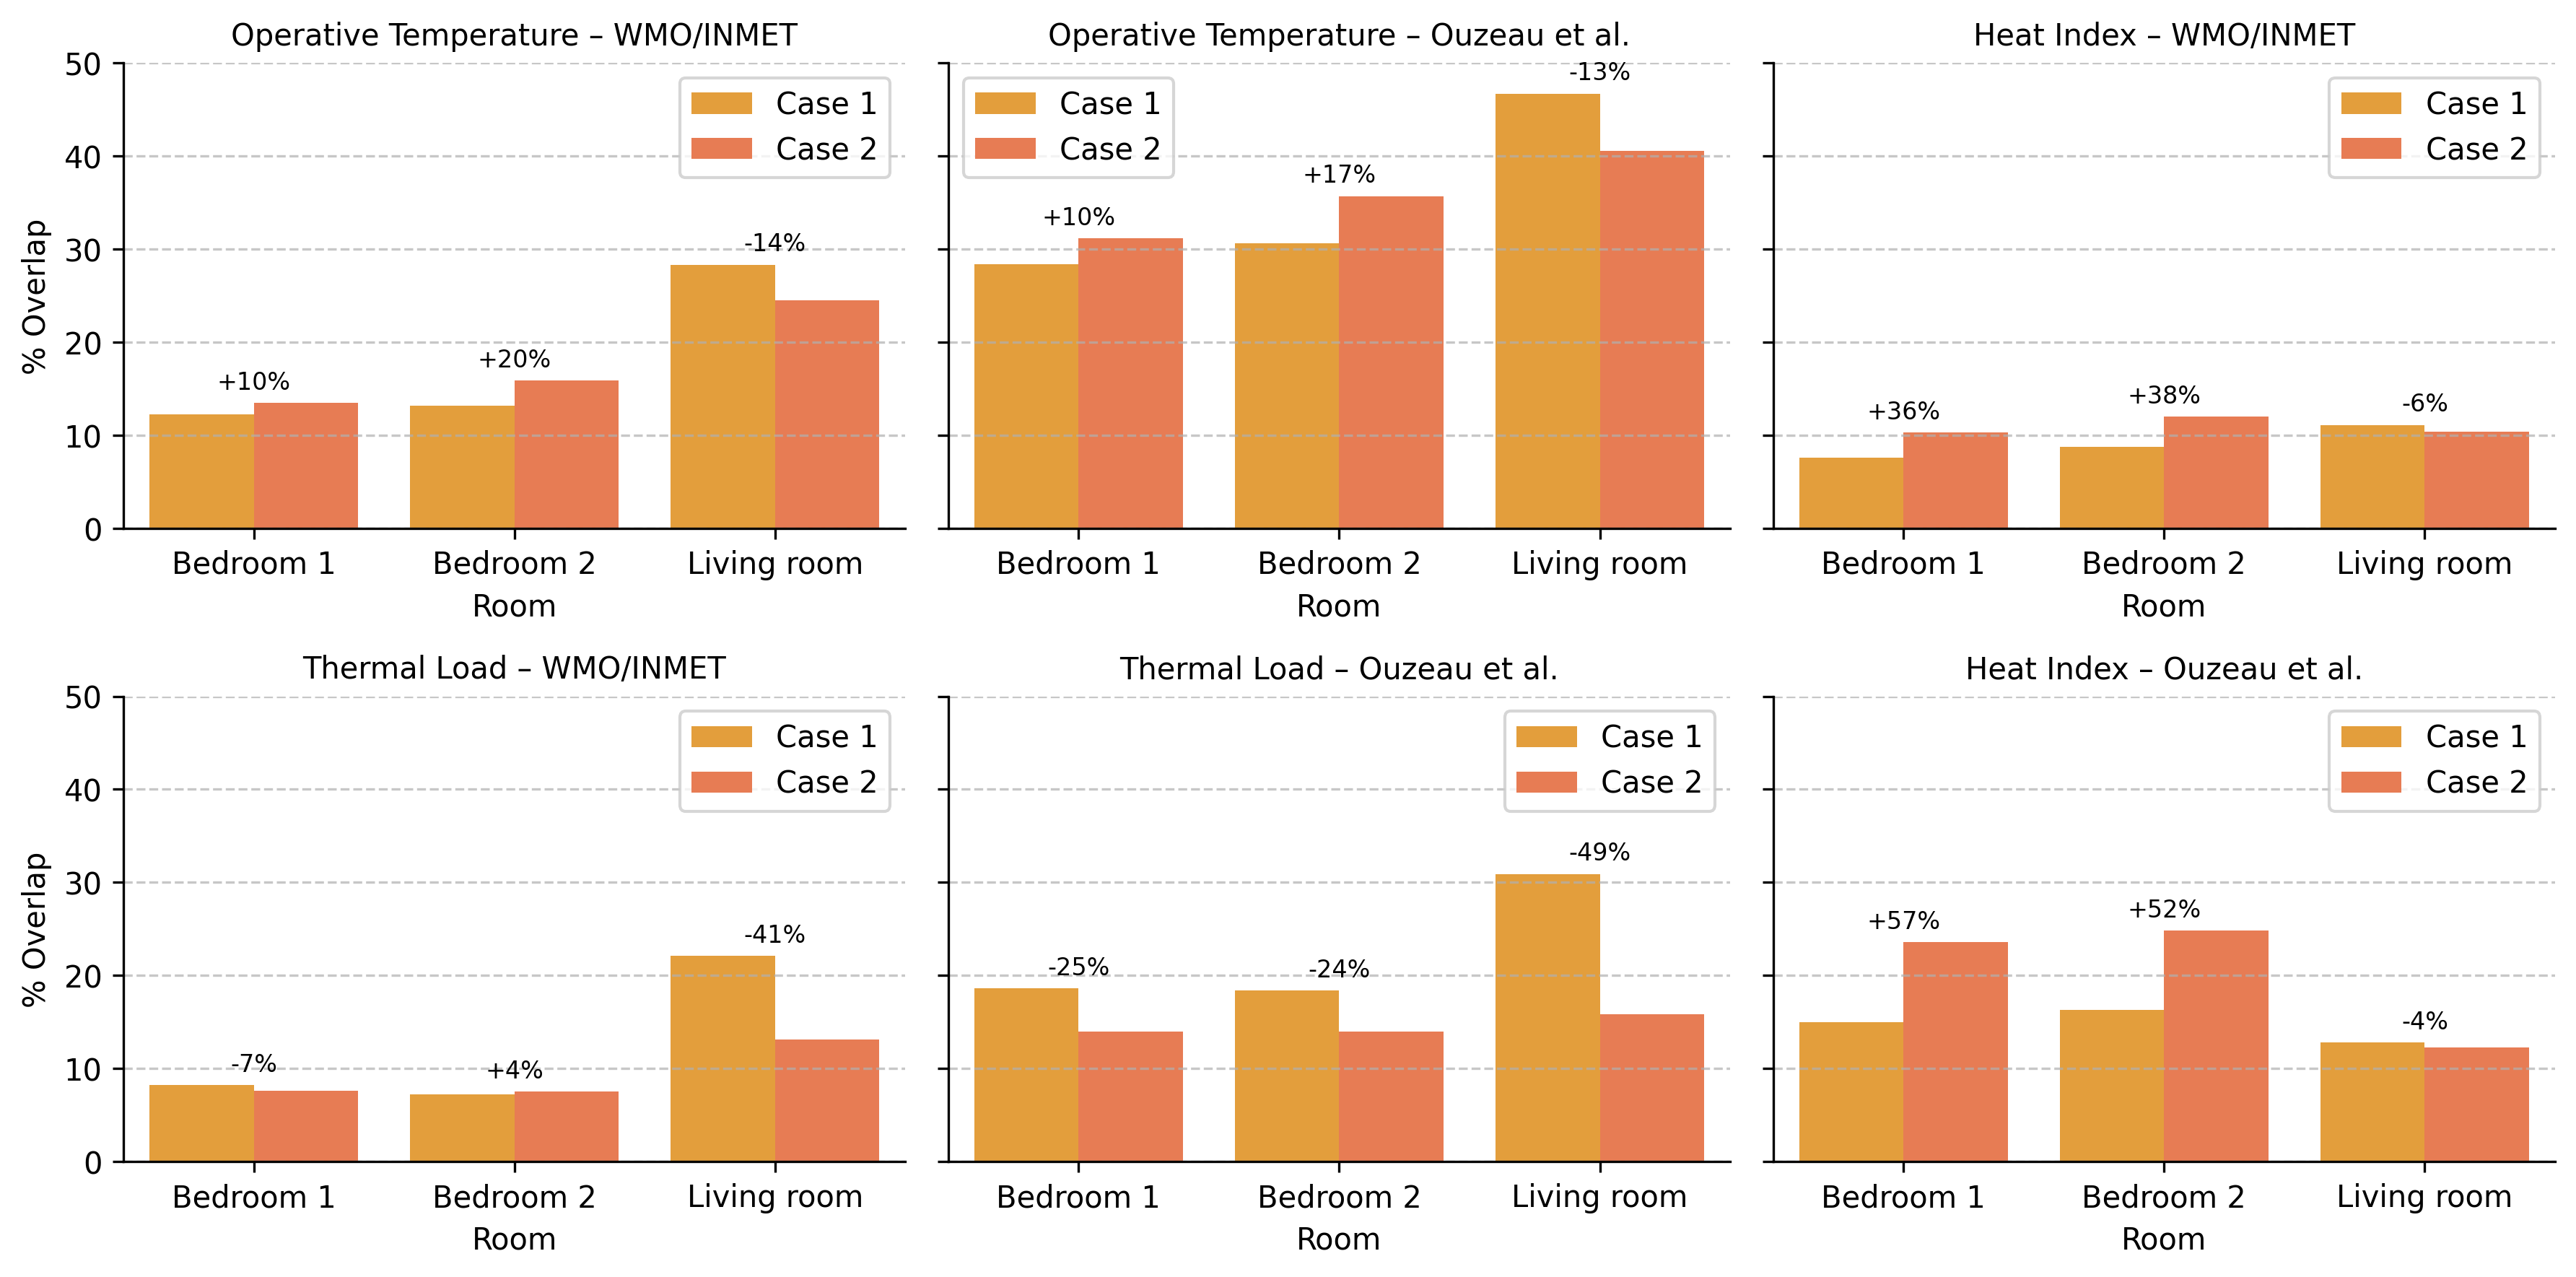

In [17]:
# Geração do barplot agrupado com y até 50%
fig, axes = plt.subplots(2, 3, figsize=(12, 6), dpi=300, sharey=True)

configs = [
    ('Temp Oper - INMET Case 1', 'Temp Oper - INMET Case 2', 'Operative Temperature – WMO/INMET', axes[0, 0]),
    ('Temp Oper - Ouzeau Case 1', 'Temp Oper - Ouzeau Case 2', 'Operative Temperature – Ouzeau et al.', axes[0, 1]),
    # NOVO: Heat Index (INMET e Ouzeau)
    ('Heat Index - INMET Case 1', 'Heat Index - INMET Case 2', 'Heat Index – WMO/INMET', axes[0, 2]),
    ('Thermal Load - INMET Case 1', 'Thermal Load - INMET Case 2', 'Thermal Load – WMO/INMET', axes[1, 0]),
    ('Thermal Load - Ouzeau Case 1', 'Thermal Load - Ouzeau Case 2', 'Thermal Load – Ouzeau et al.', axes[1, 1]),
    ('Heat Index - Ouzeau Case 1', 'Heat Index - Ouzeau Case 2', 'Heat Index – Ouzeau et al.', axes[1, 2]),
]

for var1, var2, title, ax in configs:
    melted = pd.melt(df, id_vars='Room', value_vars=[var1, var2],
                     var_name='Case', value_name='Percentage')
    melted['Case'] = melted['Case'].apply(lambda x: 'Case 1' if 'Case 1' in x else 'Case 2')

    # Cores: amarelo (Case 1), laranja (Case 2)
    sns.barplot(data=melted, x='Room', y='Percentage', hue='Case', ax=ax,
                palette=['#ffa320', '#ff713b'])

    ax.set_title(title, fontsize=10)
    ax.set_ylabel('% Overlap')
    ax.set_ylim(0, 50)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend_.set_title('')
    add_variation_labels(ax, df, var1, var2)
    sns.despine()

plt.tight_layout()
plt.savefig('barplots_grouped_y50_colored.png')
plt.show()

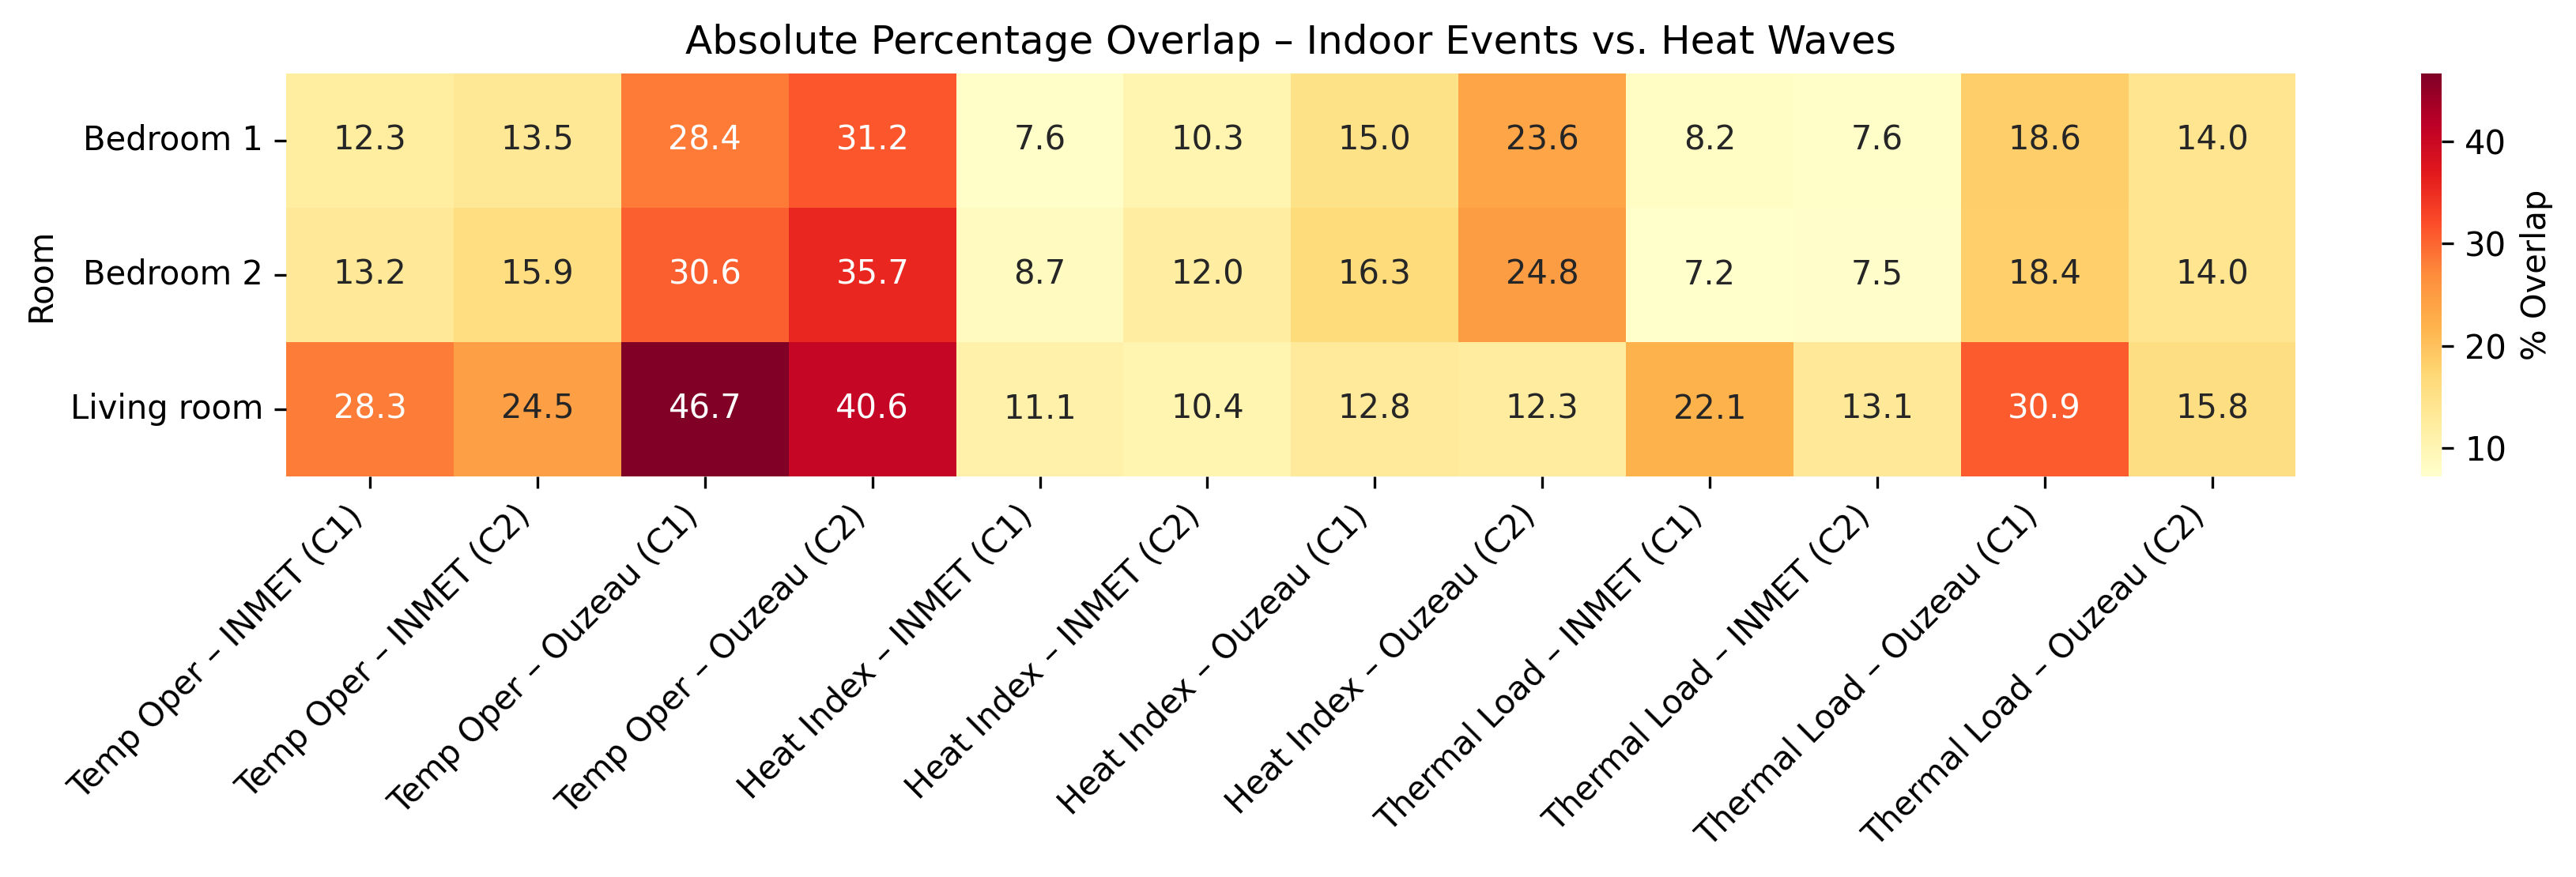

In [18]:
# Heatmap com valores absolutos
df_overlap = df.set_index('Room')[[
    'Temp Oper - INMET Case 1', 'Temp Oper - INMET Case 2',
    'Temp Oper - Ouzeau Case 1', 'Temp Oper - Ouzeau Case 2',
    'Heat Index - INMET Case 1', 'Heat Index - INMET Case 2',
    'Heat Index - Ouzeau Case 1', 'Heat Index - Ouzeau Case 2',
    'Thermal Load - INMET Case 1', 'Thermal Load - INMET Case 2',
    'Thermal Load - Ouzeau Case 1', 'Thermal Load - Ouzeau Case 2',
]]

df_overlap.columns = [
    'Temp Oper – INMET (C1)', 'Temp Oper – INMET (C2)',
    'Temp Oper – Ouzeau (C1)', 'Temp Oper – Ouzeau (C2)',
    'Heat Index – INMET (C1)', 'Heat Index – INMET (C2)',
    'Heat Index – Ouzeau (C1)', 'Heat Index – Ouzeau (C2)',
    'Thermal Load – INMET (C1)', 'Thermal Load – INMET (C2)',
    'Thermal Load – Ouzeau (C1)', 'Thermal Load – Ouzeau (C2)',
]

plt.figure(figsize=(12, 3.8), dpi=300)
sns.heatmap(df_overlap, annot=True, fmt=".1f", cmap='YlOrRd', cbar_kws={'label': '% Overlap'})
plt.title('Absolute Percentage Overlap – Indoor Events vs. Heat Waves')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('heatmap_overlap_absolute.png')
plt.show()

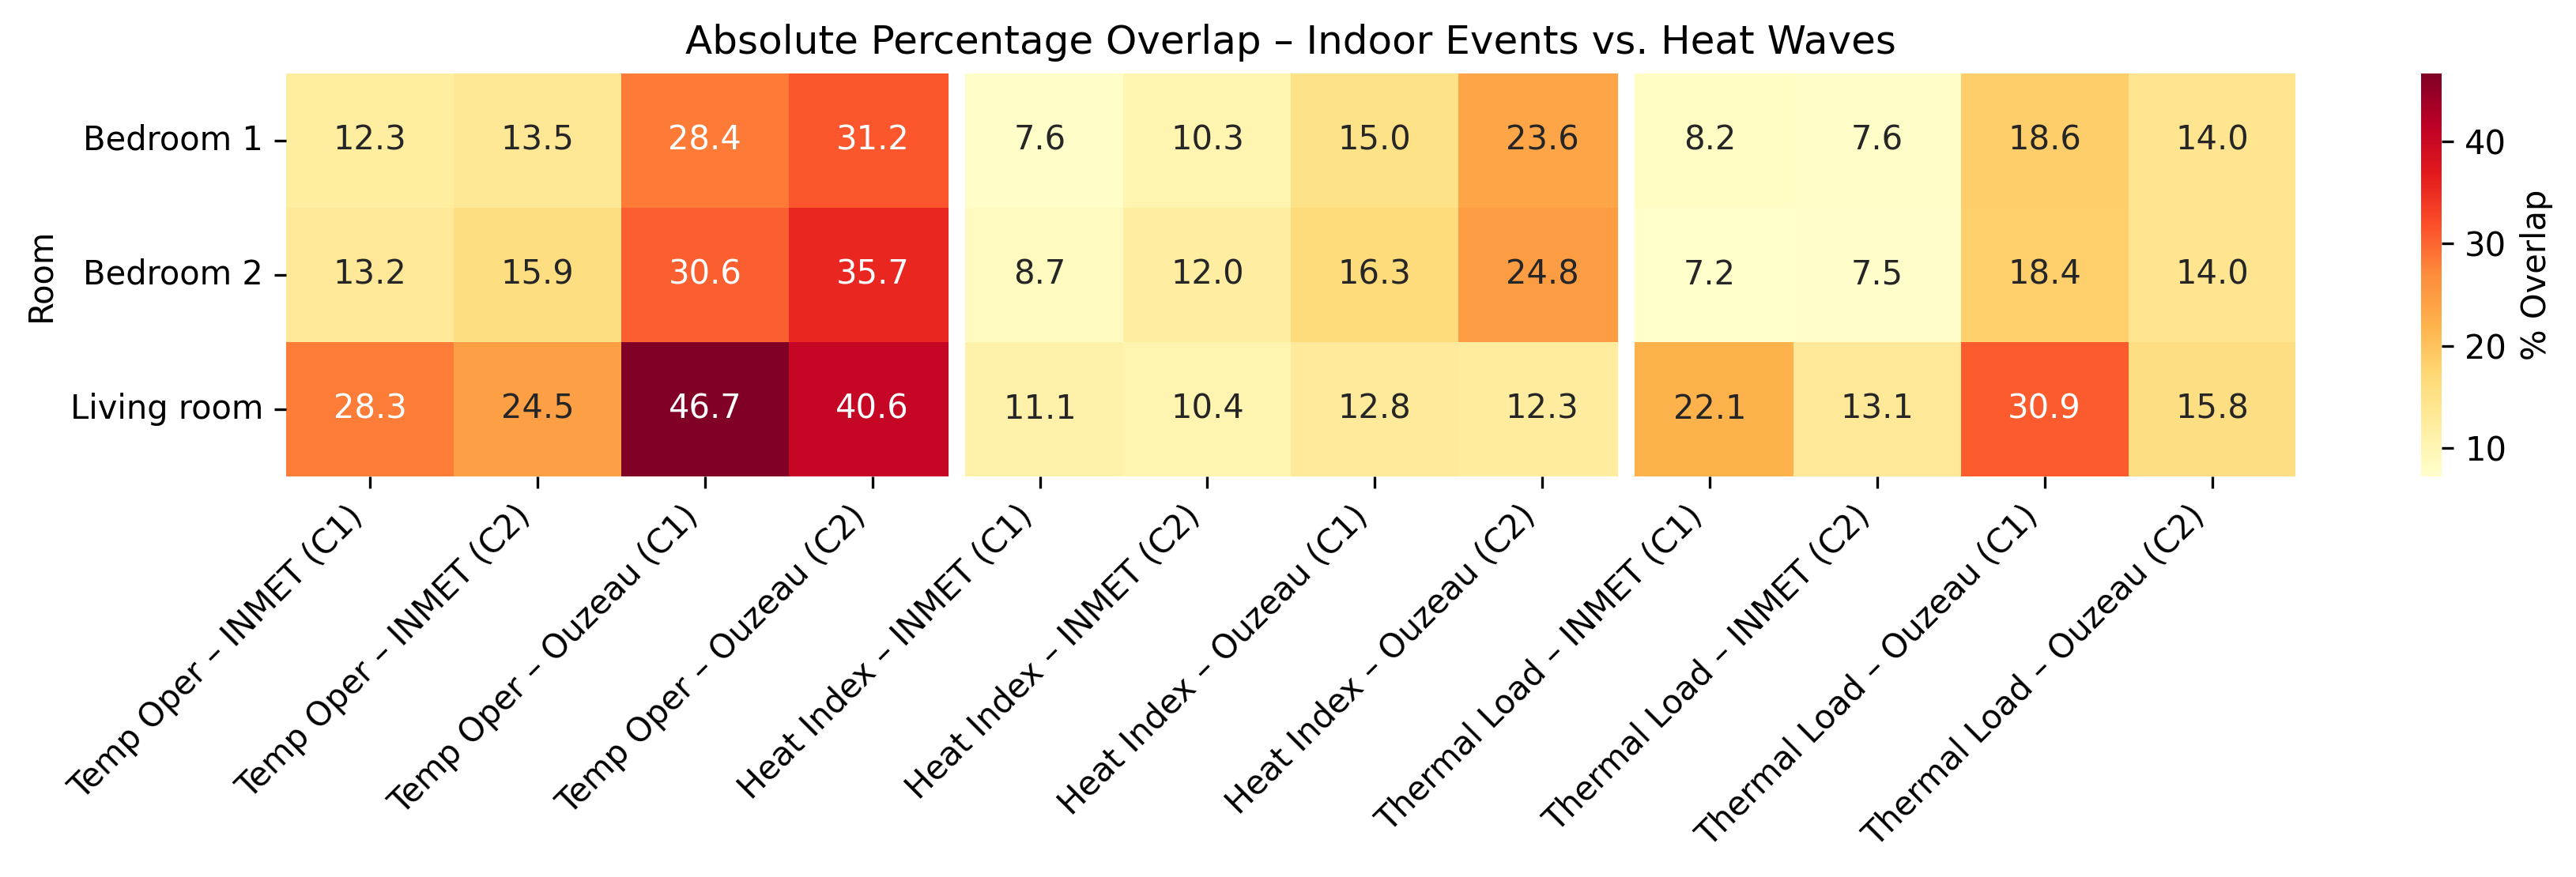

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# Heatmap com separação visual entre grupos de indicadores
# ------------------------------------------------------------

df_overlap = df.set_index('Room')[[
    'Temp Oper - INMET Case 1', 'Temp Oper - INMET Case 2',
    'Temp Oper - Ouzeau Case 1', 'Temp Oper - Ouzeau Case 2',
    'Heat Index - INMET Case 1', 'Heat Index - INMET Case 2',
    'Heat Index - Ouzeau Case 1', 'Heat Index - Ouzeau Case 2',
    'Thermal Load - INMET Case 1', 'Thermal Load - INMET Case 2',
    'Thermal Load - Ouzeau Case 1', 'Thermal Load - Ouzeau Case 2',
]]

df_overlap.columns = [
    'Temp Oper – INMET (C1)', 'Temp Oper – INMET (C2)',
    'Temp Oper – Ouzeau (C1)', 'Temp Oper – Ouzeau (C2)',
    'Heat Index – INMET (C1)', 'Heat Index – INMET (C2)',
    'Heat Index – Ouzeau (C1)', 'Heat Index – Ouzeau (C2)',
    'Thermal Load – INMET (C1)', 'Thermal Load – INMET (C2)',
    'Thermal Load – Ouzeau (C1)', 'Thermal Load – Ouzeau (C2)',
]

plt.figure(figsize=(12, 3.8), dpi=300)
ax = sns.heatmap(
    df_overlap, annot=True, fmt=".1f", cmap='YlOrRd',
    cbar_kws={'label': '% Overlap'}, linewidths=0
)

plt.title('Absolute Percentage Overlap – Indoor Events vs. Heat Waves')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')

# Adiciona linhas verticais entre grupos
group_boundaries = [4, 8]  # após Temp Oper e após Heat Index
for boundary in group_boundaries:
    ax.axvline(boundary, color='white', lw=5)
    #ax.axvline(boundary, color='black', lw=0.8, alpha=0.4)

plt.tight_layout()
plt.savefig('heatmap_overlap_absolute_grouped.png')
plt.show()
